In [654]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

In [595]:
df1 = pd.read_csv("../Flight Level Data.csv")

In [596]:
df1

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,OO,5027,2025-08-15,ORD,MCW,2025-08-15T07:45:00Z,2025-08-15T09:14:00Z,2025-08-15T07:32:00Z,2025-08-15T09:03:00Z,50,CRJ-200,Express,52,64,29
8095,OO,5037,2025-08-10,ORD,LAF,2025-08-10T12:14:00Z,2025-08-10T14:12:00Z,2025-08-10T12:04:00Z,2025-08-10T13:57:00Z,50,CRJ-200,Express,24,48,29
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15T16:50:00Z,2025-08-15T18:20:00Z,2025-08-15T17:53:00Z,2025-08-15T19:16:00Z,50,CRJ-200,Express,-16,28,29
8097,OO,5027,2025-08-06,ORD,MCW,2025-08-06T07:45:00Z,2025-08-06T09:14:00Z,2025-08-06T07:31:00Z,2025-08-06T09:01:00Z,50,CRJ-200,Express,52,60,29


In [597]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   company_id                          8099 non-null   object
 1   flight_number                       8099 non-null   int64 
 2   scheduled_departure_date_local      8099 non-null   object
 3   scheduled_departure_station_code    8099 non-null   object
 4   scheduled_arrival_station_code      8099 non-null   object
 5   scheduled_departure_datetime_local  8099 non-null   object
 6   scheduled_arrival_datetime_local    8099 non-null   object
 7   actual_departure_datetime_local     8099 non-null   object
 8   actual_arrival_datetime_local       8099 non-null   object
 9   total_seats                         8099 non-null   int64 
 10  fleet_type                          8099 non-null   object
 11  carrier                             8099 non-null   obje

In [598]:
df1.describe()

,flight_number,total_seats,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
count,8099.000000,8099.000000,8099.000000,8099.000000,8099.000000
mean,3020.995061,122.984072,183.787258,189.989999,48.039017
std,1812.647939,65.193567,565.910783,559.699915,24.017513
min,3.000000,50.000000,-980.000000,1.000000,29.000000
25%,1492.000000,50.000000,59.000000,60.000000,29.000000
50%,2440.000000,126.000000,74.000000,81.000000,43.000000
75%,4766.000000,179.000000,110.000000,125.000000,56.000000
max,6004.000000,364.000000,33327.000000,33327.000000,155.000000


In [599]:
col_datetime = ['scheduled_departure_datetime_local', 'actual_departure_datetime_local', 'scheduled_arrival_datetime_local', 'actual_arrival_datetime_local']
df1[col_datetime] = df1[col_datetime].apply(pd.to_datetime)

In [600]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    8099 non-null   datetime64[ns, UTC]
 7   actual_departure_datetime_local     8099 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       8099 non-null   datetime64[ns, UTC]
 9   total_seats                         8099 

# Question 1: Average Delay

In [601]:
df1[df1["scheduled_departure_datetime_local"] < df1["actual_departure_datetime_local"]]

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04 21:04:00+00:00,2025-08-04 18:04:00+00:00,2025-08-04 20:52:00+00:00,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06 21:04:00+00:00,2025-08-06 20:05:00+00:00,2025-08-06 22:42:00+00:00,50,CRJ-200,Express,223,38,29
6,UA,374,2025-08-15,ORD,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,Mainline,54,41,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8089,G7,4558,2025-08-03,ORD,XNA,2025-08-03 08:42:00+00:00,2025-08-03 10:43:00+00:00,2025-08-03 08:53:00+00:00,2025-08-03 10:40:00+00:00,50,CRJ-550,Express,50,69,29
8091,G7,4458,2025-08-15,ORD,LIT,2025-08-15 12:45:00+00:00,2025-08-15 14:38:00+00:00,2025-08-15 13:18:00+00:00,2025-08-15 15:23:00+00:00,50,CRJ-550,Express,65,103,29
8093,OO,5643,2025-08-04,ORD,CAK,2025-08-04 21:10:00+00:00,2025-08-04 23:46:00+00:00,2025-08-04 21:18:00+00:00,2025-08-05 00:01:00+00:00,50,CRJ-550,Express,53,26,29
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15 16:50:00+00:00,2025-08-15 18:20:00+00:00,2025-08-15 17:53:00+00:00,2025-08-15 19:16:00+00:00,50,CRJ-200,Express,-16,28,29


In [602]:
num_later_than_sched = df1[df1["scheduled_departure_datetime_local"] < df1["actual_departure_datetime_local"]]["flight_number"].count()

In [603]:
total_flights = df1["flight_number"].count()

In [604]:
perc1 = (num_later_than_sched / total_flights)*100

In [605]:
print(f"Percentage of flights that depart later than scheduled: {round(perc1, 2)}%")

Percentage of flights that depart later than scheduled: 49.61%


In [606]:
df1_test = df1.copy()

In [607]:
df1_test["delay_d"] = df1_test["actual_departure_datetime_local"] - df1_test["scheduled_departure_datetime_local"]

In [608]:
df1_test["delay_a"] = df1_test["actual_arrival_datetime_local"] - df1_test["scheduled_arrival_datetime_local"]

In [610]:
df1_test["delay_d"] = df1_test["delay_d"].dt.total_seconds() / 60

In [611]:
df1_test["delay_a"] = df1_test["delay_a"].dt.total_seconds() / 60

##### If actual departure is earlier than scheduled the delay is taken as 0, as there is no delay.

In [612]:
df1_test.loc[df1_test["delay_d"] < 0, "delay_d"] = 0

In [613]:
df1_test.loc[df1_test["delay_a"] < 0, "delay_a"] = 0

In [614]:
df1_test

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,delay_d,delay_a
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04 21:04:00+00:00,2025-08-04 18:04:00+00:00,2025-08-04 20:52:00+00:00,76,ERJ-175,Express,42,34,34,7.0,0.0
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,Mainline,235,229,145,22.0,0.0
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,Mainline,76,69,51,111.0,111.0
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06 21:04:00+00:00,2025-08-06 20:05:00+00:00,2025-08-06 22:42:00+00:00,50,CRJ-200,Express,223,38,29,105.0,98.0
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,Mainline,75,72,51,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,OO,5027,2025-08-15,ORD,MCW,2025-08-15 07:45:00+00:00,2025-08-15 09:14:00+00:00,2025-08-15 07:32:00+00:00,2025-08-15 09:03:00+00:00,50,CRJ-200,Express,52,64,29,0.0,0.0
8095,OO,5037,2025-08-10,ORD,LAF,2025-08-10 12:14:00+00:00,2025-08-10 14:12:00+00:00,2025-08-10 12:04:00+00:00,2025-08-10 13:57:00+00:00,50,CRJ-200,Express,24,48,29,0.0,0.0
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15 16:50:00+00:00,2025-08-15 18:20:00+00:00,2025-08-15 17:53:00+00:00,2025-08-15 19:16:00+00:00,50,CRJ-200,Express,-16,28,29,63.0,56.0
8097,OO,5027,2025-08-06,ORD,MCW,2025-08-06 07:45:00+00:00,2025-08-06 09:14:00+00:00,2025-08-06 07:31:00+00:00,2025-08-06 09:01:00+00:00,50,CRJ-200,Express,52,60,29,0.0,0.0


In [615]:
print(f"Average Departure Delay: {round(df1_test["delay_d"].mean(), 2)} minutes")
print(f"Average Arrival Delay: {round(df1_test["delay_a"].mean(), 2)} minutes")

Average Departure Delay: 23.35 minutes
Average Arrival Delay: 23.26 minutes


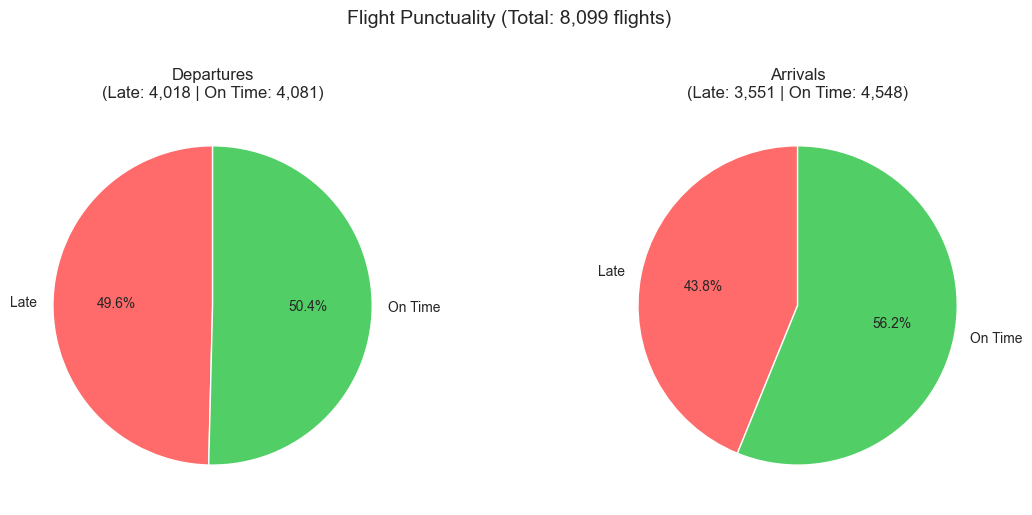

In [619]:
total_flights = len(df1_test)
late_departures = (df1_test['delay_d'] > 0).sum()
late_arrivals = (df1_test['delay_a'] > 0).sum()
on_time_departures = total_flights - late_departures
on_time_arrivals = total_flights - late_arrivals

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie([late_departures, on_time_departures], 
        labels=['Late', 'On Time'],
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#51cf66'],
        startangle=90)
ax1.set_title(f'Departures\n(Late: {late_departures:,} | On Time: {on_time_departures:,})')

ax2.pie([late_arrivals, on_time_arrivals],
        labels=['Late', 'On Time'], 
        autopct='%1.1f%%',
        colors=['#ff6b6b', '#51cf66'],
        startangle=90)
ax2.set_title(f'Arrivals\n(Late: {late_arrivals:,} | On Time: {on_time_arrivals:,})')

plt.suptitle(f'Flight Punctuality (Total: {total_flights:,} flights)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## Question 2: Flights with scheduled ground time close to or below the minimum turn mins?

In [164]:
df1_test2 = df1_test[df1_test["scheduled_ground_time_minutes"] >= 0]

##### Removing the rows with negative scheduled ground time

In [662]:
num_2 = df1_test2[df1_test2["scheduled_ground_time_minutes"] <= df1_test2["minimum_turn_minutes"]]["flight_number"].count()

In [663]:
print(f"Number of flights with scheduled ground time close to or below the minimum turn mins(excluding negative scheduled time values): {round(num_2, 2)}")

Number of flights with scheduled ground time close to or below the minimum turn mins(excluding negative scheduled time values): 347


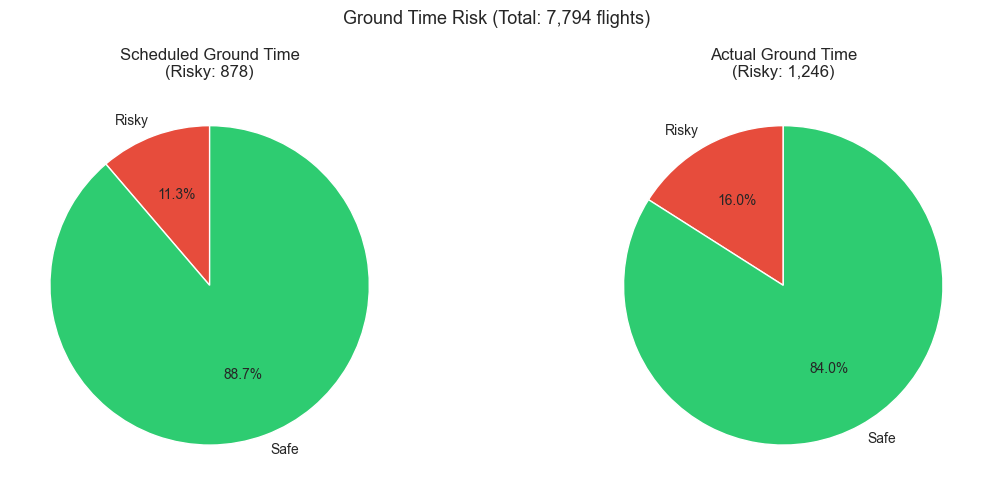

In [623]:
risky_scheduled = (df1_test2["scheduled_ground_time_minutes"] <= df1_test2["minimum_turn_minutes"] + 10).sum()
risky_actual = (df1_test2["actual_ground_time_minutes"] <= df1_test2["minimum_turn_minutes"] + 10).sum()
total = len(df1_test2)

# Two pie charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie([risky_scheduled, total - risky_scheduled], 
        labels=['Risky', 'Safe'], autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'], startangle=90)
ax1.set_title(f'Scheduled Ground Time\n(Risky: {risky_scheduled:,})')

ax2.pie([risky_actual, total - risky_actual],
        labels=['Risky', 'Safe'], autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'], startangle=90)
ax2.set_title(f'Actual Ground Time\n(Risky: {risky_actual:,})')

plt.suptitle(f'Ground Time Risk (Total: {total:,} flights)', fontsize=13)
plt.tight_layout()
plt.show()

## Question 3: Bag-Ratio

In [472]:
df2 = pd.read_csv("../Bag+Level+Data.csv")

In [473]:
duplicates = df2.duplicated()

num_duplicates = duplicates.sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 293


In [474]:
df2 = df2.drop_duplicates(df2.columns, keep='first')

In [475]:
df2

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer
...,...,...,...,...,...,...,...,...
687240,OO,5138,2025-08-15,ORD,MGW,BAGTAG_668154,2025-08-16,Origin
687241,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335255,2025-08-16,Origin
687242,OO,5138,2025-08-15,ORD,MGW,BAGTAG_335256,2025-08-16,Origin
687243,OO,5138,2025-08-15,ORD,MGW,BAGTAG_168496,2025-08-16,Origin


In [476]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686952 entries, 0 to 687244
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        686952 non-null  object
 1   flight_number                     686952 non-null  int64 
 2   scheduled_departure_date_local    686952 non-null  object
 3   scheduled_departure_station_code  686952 non-null  object
 4   scheduled_arrival_station_code    686952 non-null  object
 5   bag_tag_unique_number             686952 non-null  object
 6   bag_tag_issue_date                686952 non-null  object
 7   bag_type                          686952 non-null  object
dtypes: int64(1), object(7)
memory usage: 47.2+ MB


In [477]:
df2["bag_type"].value_counts()

bag_type
Transfer        347524
Origin          289853
Hot Transfer     49575
Name: count, dtype: int64

Total checked bags = transfer + origin + hot transfer

Total transfer bags = transfer + hot transfer.

In [479]:
total_checked = df2["bag_type"].count()

In [480]:
total_transfer = df2[(df2["bag_type"] == "Transfer") | (df2["bag_type"] == "Hot Transfer")]["bag_type"].count()

In [481]:
Bag_Ratio = total_transfer / total_checked

In [482]:
print(f"Ratio of total transfer bags vs. total checked bags: {round(Bag_Ratio, 2)}")

Ratio of total transfer bags vs. total checked bags: 0.58


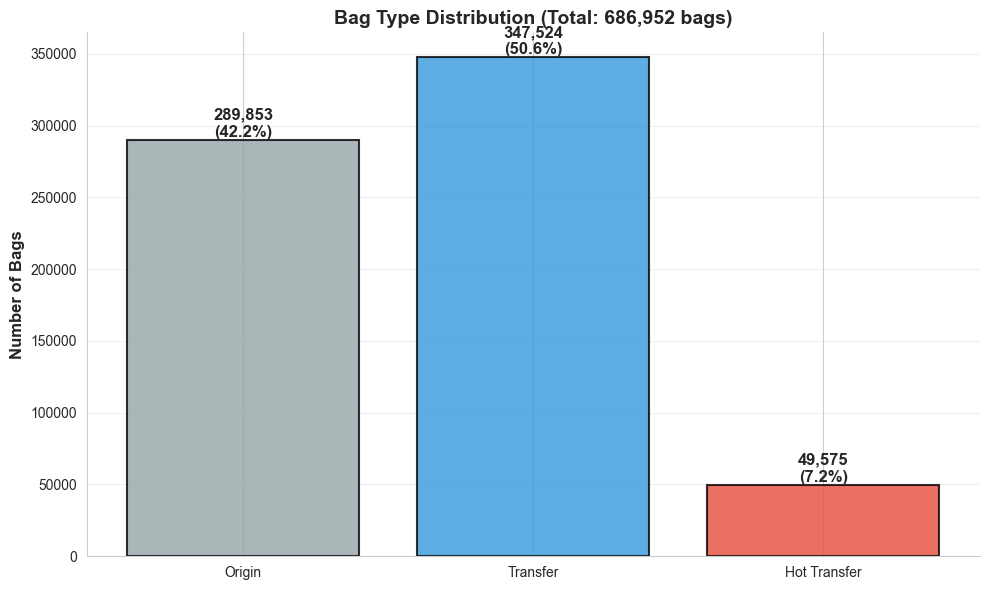

In [639]:
import matplotlib.pyplot as plt

# Calculate counts
transfer = (df2["bag_type"] == "Transfer").sum()
hot_transfer = (df2["bag_type"] == "Hot Transfer").sum()
origin = len(df2) - transfer - hot_transfer
total = len(df2)

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
categories = ['Origin', 'Transfer', 'Hot Transfer']
counts = [origin, transfer, hot_transfer]
colors = ['#95a5a6', '#3498db', '#e74c3c']

bars = ax.bar(categories, counts, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)

# Add labels
for bar, count in zip(bars, counts):
    height = bar.get_height()
    percentage = (count / total) * 100
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}\n({percentage:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Bags', fontsize=12, fontweight='bold')
ax.set_title(f'Bag Type Distribution (Total: {total:,} bags)', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [483]:
total_bags = df2.groupby('flight_number').size()

In [484]:
transfer_bags = df2[df2['bag_type'].isin(['Transfer', 'Hot Transfer'])].groupby('flight_number').size()

In [485]:
bag_ratios = transfer_bags_per_flight / total_bags_per_flight

In [486]:
print(f"Average ratio of transfer bags vs. checked bags across flights: {round(bag_ratios.mean(), 2)}")

Average ratio of transfer bags vs. checked bags across flights: 0.79


## Question 4: Passenger Load

In [299]:
df3 = pd.read_csv("../PNR+Flight+Level+Data.csv")

In [300]:
df3

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...
687873,UA,291,2025-08-03,ORD,BDL,PNR_271652,2025-07-17,1,N,0,N,0
687874,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,Y,0
687875,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,Y,0,N,0
687876,UA,1139,2025-08-07,ORD,DSM,PNR_363174,2025-07-06,2,N,0,N,0


In [520]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8099 entries, 0 to 8098
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          8099 non-null   object             
 1   flight_number                       8099 non-null   int64              
 2   scheduled_departure_date_local      8099 non-null   object             
 3   scheduled_departure_station_code    8099 non-null   object             
 4   scheduled_arrival_station_code      8099 non-null   object             
 5   scheduled_departure_datetime_local  8099 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    8099 non-null   datetime64[ns, UTC]
 7   actual_departure_datetime_local     8099 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       8099 non-null   datetime64[ns, UTC]
 9   total_seats                         8099 

In [301]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687878 entries, 0 to 687877
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        687878 non-null  object
 1   flight_number                     687878 non-null  int64 
 2   scheduled_departure_date_local    687878 non-null  object
 3   scheduled_departure_station_code  687878 non-null  object
 4   scheduled_arrival_station_code    687878 non-null  object
 5   record_locator                    687878 non-null  object
 6   pnr_creation_date                 687878 non-null  object
 7   total_pax                         687878 non-null  int64 
 8   is_child                          687878 non-null  object
 9   basic_economy_ind                 687878 non-null  int64 
 10  is_stroller_user                  687878 non-null  object
 11  lap_child_count                   687878 non-null  int64 
dtypes:

In [555]:
passenger_counts = df3.groupby(
    ['company_id', 'scheduled_departure_station_code', 'scheduled_arrival_station_code',
     'flight_number', 'scheduled_departure_date_local',]
).agg(
    total_passengers=('total_pax', 'count'),
    lap_children=('lap_child_count', 'sum')
).reset_index()

passenger_counts['total_people_onboard'] = (
    passenger_counts['total_passengers'] + passenger_counts['lap_children']
)
passenger_counts

,company_id,scheduled_departure_station_code,scheduled_arrival_station_code,flight_number,scheduled_departure_date_local,total_passengers,lap_children,total_people_onboard
0,G7,ORD,ABE,4461,2025-08-01,46,0,46
1,G7,ORD,ABE,4461,2025-08-02,40,1,41
2,G7,ORD,ABE,4461,2025-08-03,41,1,42
3,G7,ORD,ABE,4461,2025-08-04,42,0,42
4,G7,ORD,ABE,4461,2025-08-05,41,0,41
...,...,...,...,...,...,...,...,...
8066,YX,ORD,YYZ,3601,2025-08-11,54,0,54
8067,YX,ORD,YYZ,3601,2025-08-12,61,0,61
8068,YX,ORD,YYZ,3601,2025-08-13,59,0,59
8069,YX,ORD,YYZ,3601,2025-08-14,62,2,64


In [556]:
df_seats = pd.merge(
    df1,
    passenger_counts,
    on=merge_keys,
    how='left'
)

print("Merged data with passengers and seats:")
df_seats[['company_id', 'flight_number', 'scheduled_departure_date_local', 'total_seats', 'total_people_onboard']]

Merged data with passengers and seats:


,company_id,flight_number,scheduled_departure_date_local,total_seats,total_people_onboard
0,OO,4792,2025-08-04,76,55
1,UA,920,2025-08-03,167,100
2,UA,1776,2025-08-10,166,133
3,OO,5790,2025-08-06,50,38
4,UA,1398,2025-08-05,166,112
...,...,...,...,...,...
8094,OO,5027,2025-08-15,50,7
8095,OO,5037,2025-08-10,50,10
8096,OO,5135,2025-08-15,50,5
8097,OO,5027,2025-08-06,50,3


In [558]:
df_seats.columns

Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'scheduled_departure_datetime_local',
       'scheduled_arrival_datetime_local', 'actual_departure_datetime_local',
       'actual_arrival_datetime_local', 'total_seats', 'fleet_type', 'carrier',
       'scheduled_ground_time_minutes', 'actual_ground_time_minutes',
       'minimum_turn_minutes', 'arrival_delay', 'total_passengers',
       'lap_children', 'total_people_onboard'],
      dtype='object')

In [559]:
df_seats["ground_time_prob"] = df_seats['minimum_turn_minutes'] - df_seats['actual_ground_time_minutes']

In [560]:
df_seats.loc[df_seats["ground_time_prob"] < 0, 'ground_time_prob'] = 0

In [561]:
df_seats['load_factor'] = (df_seats['total_people_onboard'] / df_seats['total_seats']) * 100

In [562]:
df_seats["delay_d"] = df_seats["actual_departure_datetime_local"] - df_seats["scheduled_departure_datetime_local"]

In [563]:
df_seats["delay_a"] = df_seats["actual_arrival_datetime_local"] - df_seats["scheduled_arrival_datetime_local"]

In [564]:
df_seats["delay_d"] = df_seats["delay_d"].dt.total_seconds() / 60
df_seats["delay_a"] = df_seats["delay_a"].dt.total_seconds() / 60

In [565]:
df_seats.loc[df_seats["delay_a"] < 0, "delay_a"] = 0
df_seats.loc[df_seats["delay_d"] < 0, "delay_d"] = 0

In [566]:
print("Load Factor Statistics:")
df_seats['load_factor'].describe()

Load Factor Statistics:


count    8099.000000
mean       71.186149
std        13.962381
min         6.000000
25%        64.473684
50%        73.931624
75%        80.722892
max       104.000000
Name: load_factor, dtype: float64

In [515]:
print("Flights with the Lowest Load Factor:")
df_seats.sort_values('load_factor')[['flight_number', 'delay_d', 'delay_a', 'ground_time_prob', 'load_factor']]

Flights with the Lowest Load Factor:


,flight_number,delay_d,delay_a,ground_time_prob,load_factor
8097,5027,0.0,0.0,0,6.0
8098,5136,41.0,41.0,0,6.0
7053,5027,0.0,0.0,0,6.0
2135,5121,0.0,0.0,0,6.0
5993,5136,0.0,0.0,0,6.0
...,...,...,...,...,...
4635,1793,0.0,0.0,0,100.0
3280,5230,1.0,0.0,0,100.0
2896,4585,29.0,11.0,0,100.0
5523,5564,3.0,12.0,0,102.0


In [665]:
df_seats[['load_factor','delay_a','delay_d']].corr()

,load_factor,delay_a,delay_d
load_factor,1.000000,-0.152720,-0.158894
delay_a,-0.152720,1.000000,0.933003
delay_d,-0.158894,0.933003,1.000000


In [572]:
df_seats.columns

Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'scheduled_departure_datetime_local',
       'scheduled_arrival_datetime_local', 'actual_departure_datetime_local',
       'actual_arrival_datetime_local', 'total_seats', 'fleet_type', 'carrier',
       'scheduled_ground_time_minutes', 'actual_ground_time_minutes',
       'minimum_turn_minutes', 'arrival_delay', 'total_passengers',
       'lap_children', 'total_people_onboard', 'ground_time_prob',
       'load_factor', 'delay_d', 'delay_a'],
      dtype='object')

In [627]:
Q1_d = df_seats['delay_d'].quantile(0.05)
Q3_d = df_seats['delay_d'].quantile(0.95)
IQR_d = Q3_d - Q1_d
lower_bound_d = Q1_d - 1.5 * IQR_d
upper_bound_d = Q3_d + 1.5 * IQR_d

Q1_a = df_seats['delay_a'].quantile(0.05)
Q3_a = df_seats['delay_a'].quantile(0.95)
IQR_a = Q3_a - Q1_a
lower_bound_a = Q1_a - 1.5 * IQR_a
upper_bound_a = Q3_a + 1.5 * IQR_a

Q1_lf = df_seats['load_factor'].quantile(0.05)
Q3_lf = df_seats['load_factor'].quantile(0.95)
IQR_lf = Q3_lf - Q1_lf
lower_bound_lf = Q1_lf - 1.5 * IQR_lf
upper_bound_lf = Q3_lf + 1.5 * IQR_lf

df_no_outliers = df_seats[
    (df_seats['delay_d'] >= lower_bound_d) & (df_seats['delay_d'] <= upper_bound_d) &
    (df_seats['delay_a'] >= lower_bound_a) & (df_seats['delay_a'] <= upper_bound_a) &
    (df_seats['load_factor'] >= lower_bound_lf) & (df_seats['load_factor'] <= upper_bound_lf)
].copy()

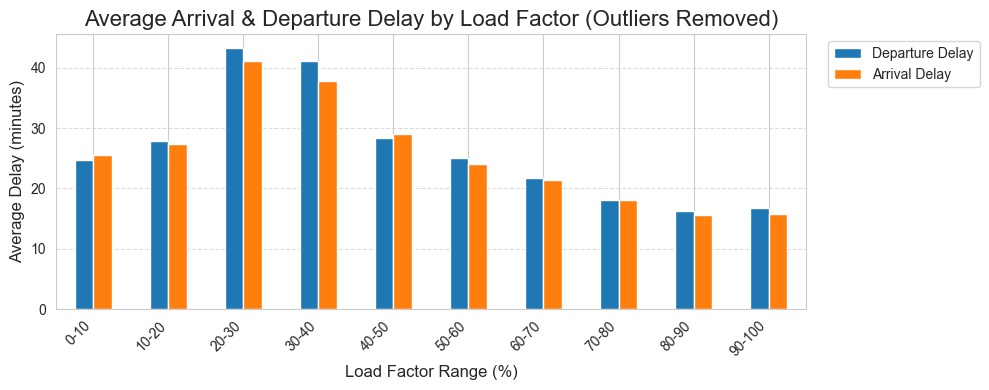

In [641]:
bins = range(0, 101, 10)
labels = [f'{i}-{i+10}' for i in bins[:-1]]
df_no_outliers['load_factor_range'] = pd.cut(df_no_outliers['load_factor'],
                                             bins=bins,
                                             labels=labels,
                                             right=False)

# Group by the load factor range and calculate the mean of the delays
delay_means = df_no_outliers.groupby('load_factor_range', observed=True)[['delay_d', 'delay_a']].mean()


# --- Step 3: Create the Bar Plot ---
fig, ax = plt.subplots(figsize=(10, 4))
delay_means.plot(kind='bar', ax=ax)

# --- Customize the Plot ---
ax.set_title('Average Arrival & Departure Delay by Load Factor (Outliers Removed)', fontsize=16)
ax.set_xlabel('Load Factor Range (%)', fontsize=12)
ax.set_ylabel('Average Delay (minutes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# --- Place the legend outside the plot ---
# The bbox_to_anchor=(1.02, 1) moves the legend to the right of the plot.
ax.legend(['Departure Delay', 'Arrival Delay'], loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout() # Adjusts plot to ensure everything fits

# --- Display the Plot ---
plt.show()

## Question 5

In [375]:
df4 = pd.read_csv("../PNR Remark Level Data.csv")

In [650]:
passenger_counts = df3.groupby(
    [
        'company_id',
        'scheduled_departure_station_code',
        'scheduled_arrival_station_code',
        'flight_number',
        'scheduled_departure_date_local'
    ]
).agg(
    total_passengers=('total_pax', 'sum'),
    lap_children=('lap_child_count', 'sum')
).reset_index()

passenger_counts['total_people_onboard'] = (
    passenger_counts['total_passengers'] + passenger_counts['lap_children']
)

df_passengers_ssrs = pd.merge(
    df3,
    df4.groupby('record_locator').size().reset_index(name='ssr_count'),
    on='record_locator',
    how='left'
)

ssrs_per_flight = df_passengers_ssrs.groupby(
    [
        'company_id',
        'scheduled_departure_station_code',
        'scheduled_arrival_station_code',
        'flight_number',
        'scheduled_departure_date_local'
    ]
)['ssr_count'].sum().reset_index()


df_main = pd.merge(
    df1,
    passenger_counts[
        [
            'company_id',
            'scheduled_departure_station_code',
            'scheduled_arrival_station_code',
            'flight_number',
            'scheduled_departure_date_local',
            'total_people_onboard'
        ]
    ],
    on=[
        'company_id',
        'scheduled_departure_station_code',
        'scheduled_arrival_station_code',
        'flight_number',
        'scheduled_departure_date_local'
    ],
    how='left'
)

df_main = pd.merge(
    df_main,
    ssrs_per_flight[
        [
            'company_id',
            'scheduled_departure_station_code',
            'scheduled_arrival_station_code',
            'flight_number',
            'scheduled_departure_date_local',
            'ssr_count'
        ]
    ],
    on=[
        'company_id',
        'scheduled_departure_station_code',
        'scheduled_arrival_station_code',
        'flight_number',
        'scheduled_departure_date_local'
    ],
    how='left'
)

df_main['delay_a'] = (
    (df_main['actual_arrival_datetime_local'] - df_main['scheduled_arrival_datetime_local'])
    .dt.total_seconds() / 60
)
df_main['delay_d'] = (
    (df_main['actual_departure_datetime_local'] - df_main['scheduled_departure_datetime_local'])
    .dt.total_seconds() / 60
)

df_main.loc[df_main["delay_a"] < 0, "delay_a"] = 0
df_main.loc[df_main["delay_d"] < 0, "delay_d"] = 0

df_main['load_factor'] = (df_main['total_people_onboard'] / df_main['total_seats']) * 100
df_main['load_category'] = df_main['load_factor'].apply(lambda x: 'High Load' if x >= 90 else 'Normal Load')
df_main['ssr_category'] = df_main['ssr_count'].apply(lambda x: 'High SSR' if x > 3 else 'Low SSR')

final_analysis = (
    df_main
    .groupby(['load_category', 'ssr_category'])[['delay_a', 'delay_d']]
    .mean()
    .reset_index()
)

print("Average Arrival/Departure Delay by Load and SSR Category:")
print(final_analysis)

Average Arrival/Departure Delay by Load and SSR Category:
  load_category ssr_category    delay_a    delay_d
0     High Load     High SSR  19.484250  19.638458
1     High Load      Low SSR  17.084165  17.091974
2   Normal Load     High SSR  45.552699  46.541131
3   Normal Load      Low SSR  40.233596  39.271654


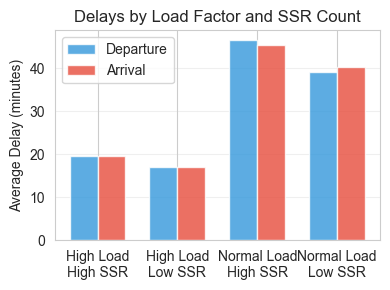

In [651]:
final_analysis = df_main.groupby(['load_category', 'ssr_category'])[['delay_a', 'delay_d']].mean().reset_index()
categories = final_analysis.apply(lambda x: f"{x['load_category']}\n{x['ssr_category']}", axis=1)

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(len(categories))
width = 0.35

ax.bar(x - width/2, final_analysis['delay_d'], width, label='Departure', color='#3498db', alpha=0.8)
ax.bar(x + width/2, final_analysis['delay_a'], width, label='Arrival', color='#e74c3c', alpha=0.8)

ax.set_ylabel('Average Delay (minutes)')
ax.set_title('Delays by Load Factor and SSR Count')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [652]:
df_main.groupby(['load_category', 'ssr_category']).size()

load_category  ssr_category
High Load      High SSR        4254
               Low SSR         2305
Normal Load    High SSR         778
               Low SSR          762
dtype: int64

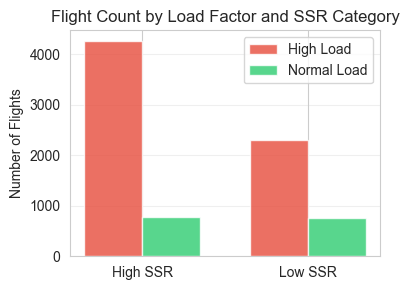

In [653]:
counts = df_main.groupby(['load_category', 'ssr_category']).size().reset_index(name='count')

# Plot
fig, ax = plt.subplots(figsize=(4, 3))
x = np.arange(len(counts['load_category'].unique()))
width = 0.35

high_load = counts[counts['load_category'] == 'High Load']
normal_load = counts[counts['load_category'] == 'Normal Load']

ax.bar(x - width/2, high_load['count'], width, label='High Load', color='#e74c3c', alpha=0.8)
ax.bar(x + width/2, normal_load['count'], width, label='Normal Load', color='#2ecc71', alpha=0.8)

ax.set_ylabel('Number of Flights')
ax.set_title('Flight Count by Load Factor and SSR Category')
ax.set_xticks(x)
ax.set_xticklabels(high_load['ssr_category'])
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Flight Difficulty Score

In [380]:
df_main.columns

Index(['company_id', 'flight_number', 'scheduled_departure_date_local',
       'scheduled_departure_station_code', 'scheduled_arrival_station_code',
       'scheduled_departure_datetime_local',
       'scheduled_arrival_datetime_local', 'actual_departure_datetime_local',
       'actual_arrival_datetime_local', 'total_seats', 'fleet_type', 'carrier',
       'scheduled_ground_time_minutes', 'actual_ground_time_minutes',
       'minimum_turn_minutes', 'total_people_onboard', 'ssr_count', 'delay_a',
       'delay_d', 'load_factor', 'load_category', 'ssr_category'],
      dtype='object')

In [381]:
df_main

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,...,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,total_people_onboard,ssr_count,delay_a,delay_d,load_factor,load_category,ssr_category
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04 17:57:00+00:00,2025-08-04 21:04:00+00:00,2025-08-04 18:04:00+00:00,2025-08-04 20:52:00+00:00,76,...,42,34,34,65,14.0,0.0,7.0,85.526316,Normal Load,High SSR
1,UA,920,2025-08-03,ORD,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,...,235,229,145,172,6.0,0.0,22.0,102.994012,High Load,High SSR
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,...,76,69,51,180,1.0,111.0,111.0,108.433735,High Load,Low SSR
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06 18:20:00+00:00,2025-08-06 21:04:00+00:00,2025-08-06 20:05:00+00:00,2025-08-06 22:42:00+00:00,50,...,223,38,29,55,8.0,98.0,105.0,110.000000,High Load,High SSR
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,...,75,72,51,136,10.0,20.0,0.0,81.927711,Normal Load,High SSR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8094,OO,5027,2025-08-15,ORD,MCW,2025-08-15 07:45:00+00:00,2025-08-15 09:14:00+00:00,2025-08-15 07:32:00+00:00,2025-08-15 09:03:00+00:00,50,...,52,64,29,12,0.0,0.0,0.0,24.000000,Normal Load,Low SSR
8095,OO,5037,2025-08-10,ORD,LAF,2025-08-10 12:14:00+00:00,2025-08-10 14:12:00+00:00,2025-08-10 12:04:00+00:00,2025-08-10 13:57:00+00:00,50,...,24,48,29,10,0.0,0.0,0.0,20.000000,Normal Load,Low SSR
8096,OO,5135,2025-08-15,ORD,MCW,2025-08-15 16:50:00+00:00,2025-08-15 18:20:00+00:00,2025-08-15 17:53:00+00:00,2025-08-15 19:16:00+00:00,50,...,-16,28,29,8,0.0,56.0,63.0,16.000000,Normal Load,Low SSR
8097,OO,5027,2025-08-06,ORD,MCW,2025-08-06 07:45:00+00:00,2025-08-06 09:14:00+00:00,2025-08-06 07:31:00+00:00,2025-08-06 09:01:00+00:00,50,...,52,60,29,7,0.0,0.0,0.0,14.000000,Normal Load,Low SSR


In [656]:
df_main['groundtime_prob'] = df_main['actual_ground_time_minutes'] - df_main['scheduled_ground_time_minutes']
df_main.loc[df_main['groundtime_prob'] < 0, 'groundtime_prob'] = 0

In [657]:
df_main[['load_factor', 'ssr_count', 'delay_d', 'total_people_onboard', 'groundtime_prob','delay_a']].corr()

,load_factor,ssr_count,delay_d,total_people_onboard,groundtime_prob,delay_a
load_factor,1.000000,0.179255,-0.154729,0.491672,-0.100530,-0.150160
ssr_count,0.179255,1.000000,0.034992,0.445758,0.033624,0.031336
delay_d,-0.154729,0.034992,1.000000,-0.031517,0.804940,0.933003
total_people_onboard,0.491672,0.445758,-0.031517,1.000000,0.002573,-0.030742
groundtime_prob,-0.100530,0.033624,0.804940,0.002573,1.000000,0.761674
delay_a,-0.150160,0.031336,0.933003,-0.030742,0.761674,1.000000


In [658]:
features = ['delay_d', 'groundtime_prob']
target = 'delay_a'

df_main = df_main.dropna(subset=features + [target]).reset_index(drop=True)

X = df_main[features]
y = df_main[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

df_main['difficulty_score'] = model.predict(X)

y_pred = df_main['difficulty_score']

r2 = r2_score(y, y_pred)
print("R² score:", r2)

accuracy_5min = (abs(y - y_pred) <= 5).mean() * 100
print("Percentage of predictions within 5 minutes:", round(accuracy_5min, 2), "%")

R² score: 0.8982420169167359
Percentage of predictions within 5 minutes: 66.53 %


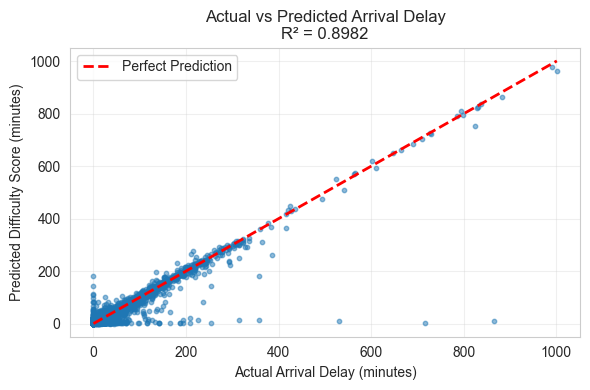

In [659]:
plt.figure(figsize=(6, 4))
plt.scatter(df_main['delay_a'], df_main['difficulty_score'], alpha=0.5, s=10)
plt.plot([df_main['delay_a'].min(), df_main['delay_a'].max()], 
         [df_main['delay_a'].min(), df_main['delay_a'].max()], 
         'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Arrival Delay (minutes)')
plt.ylabel('Predicted Difficulty Score (minutes)')
plt.title(f'Actual vs Predicted Arrival Delay\nR² = {r2:.4f}')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [634]:
def rank_and_classify_daily(group):
    group['daily_rank'] = group['difficulty_score'].rank(method='dense', ascending=False).astype(int)
    
    group = group.sort_values(by='daily_rank', ascending=True)

    group['difficulty_category'] = pd.qcut(
        group['daily_rank'],
        q=[0, 0.2, 0.7, 1.0],
        labels=['Difficult', 'Medium', 'Easy']
    )
    return group[['flight_number', 'scheduled_departure_date_local', 'difficulty_score', 'daily_rank', 'difficulty_category']]

In [635]:
daily_calcs = df_main.groupby('scheduled_departure_date_local', group_keys=False).apply(rank_and_classify_daily)

daily_calcs = daily_calcs.sort_values(['scheduled_departure_date_local', 'daily_rank']).reset_index(drop=True)

daily_calcs

C:\Users\Victus\AppData\Local\Temp\ipykernel_24796\2129001198.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  daily_calcs = df_main.groupby('scheduled_departure_date_local', group_keys=False).apply(rank_and_classify_daily)


,flight_number,scheduled_departure_date_local,difficulty_score,daily_rank,difficulty_category
0,5260,2025-08-01,474.99,1,Difficult
1,5314,2025-08-01,229.58,2,Difficult
2,4425,2025-08-01,183.14,3,Difficult
3,5138,2025-08-01,174.76,4,Difficult
4,5376,2025-08-01,170.67,5,Difficult
...,...,...,...,...,...
8094,4778,2025-08-15,0.01,249,Easy
8095,1381,2025-08-15,0.00,250,Easy
8096,2417,2025-08-15,0.00,250,Easy
8097,4395,2025-08-15,0.00,250,Easy


C:\Users\Victus\AppData\Local\Temp\ipykernel_24796\2491744954.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_counts = daily_calcs.groupby(


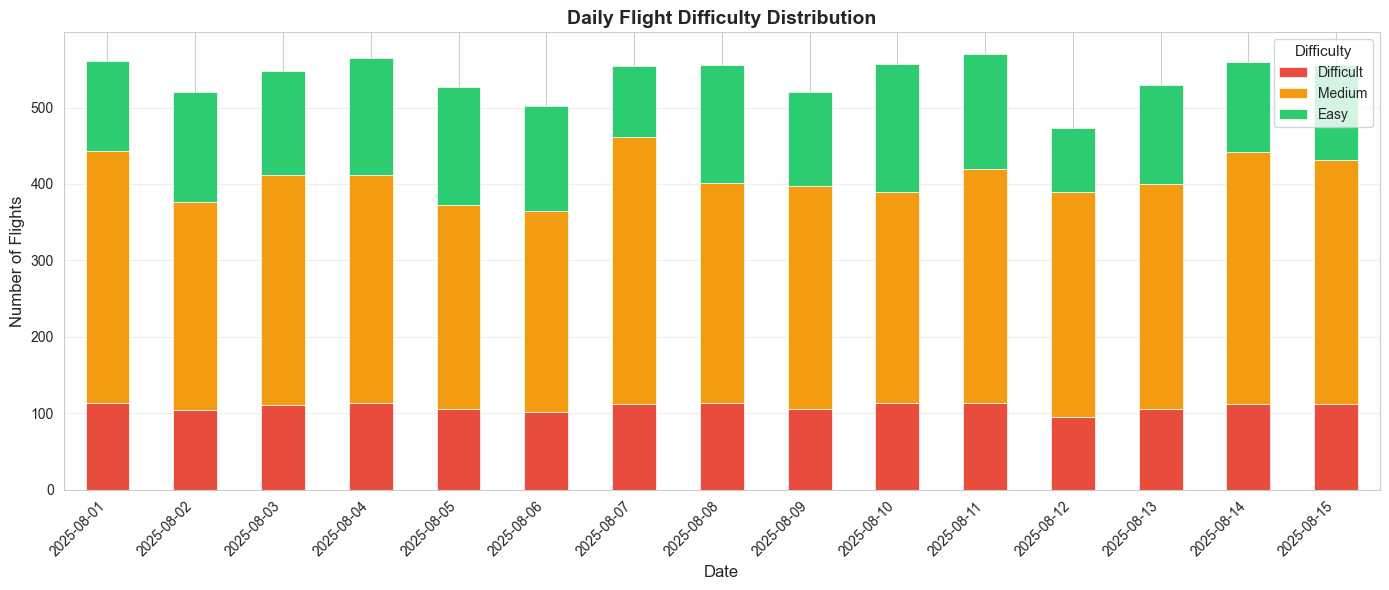

In [638]:
daily_counts = daily_calcs.groupby(
    ['scheduled_departure_date_local', 'difficulty_category']
)['flight_number'].count().reset_index(name='flight_count')

daily_pivot = daily_counts.pivot(
    index='scheduled_departure_date_local',
    columns='difficulty_category',
    values='flight_count'
).fillna(0)

# Plot with better colors
fig, ax = plt.subplots(figsize=(14, 6))
daily_pivot.plot(
    kind='bar',
    stacked=True,
    ax=ax,
    color=['#e74c3c', '#f39c12','#2ecc71'],  # Green, Orange, Red
    edgecolor='white',
    linewidth=0.5
)

ax.set_title('Daily Flight Difficulty Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Number of Flights', fontsize=12)
ax.legend(title='Difficulty', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()